Simple Linear Regression Case Study
-Olympic running prediction

Step 1: load the data

In [2]:
#load the dataset
import numpy as np
data = np.loadtxt('olympic100m.txt', delimiter=',')
print(data)

[[1896.     12.  ]
 [1900.     11.  ]
 [1904.     11.  ]
 [1906.     11.2 ]
 [1908.     10.8 ]
 [1912.     10.8 ]
 [1920.     10.8 ]
 [1924.     10.6 ]
 [1928.     10.8 ]
 [1932.     10.3 ]
 [1936.     10.3 ]
 [1948.     10.3 ]
 [1952.     10.4 ]
 [1956.     10.5 ]
 [1960.     10.2 ]
 [1964.     10.  ]
 [1968.      9.95]
 [1972.     10.14]
 [1976.     10.06]
 [1980.     10.25]
 [1984.      9.99]
 [1988.      9.92]
 [1992.      9.96]
 [1996.      9.84]
 [2000.      9.87]
 [2004.      9.85]
 [2008.      9.69]]


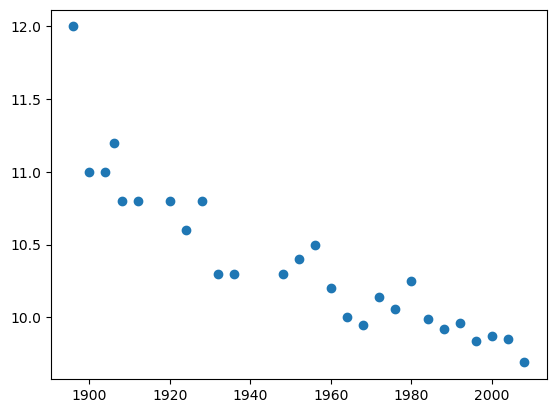

In [3]:
#plot the data
%matplotlib inline
import pylab as plt
x = data[:,0]
y = data[:,1]
plt.scatter(x, y)

Step2: Build the linear regression model to make prediction at 2012

In [4]:
from sklearn.linear_model import LinearRegression
x = x[:, None] 
y = y[:, None]
# fit the model
reg = LinearRegression().fit(x,y)
print(reg.intercept_, reg.coef_)

[36.4164559] [[-0.01333089]]


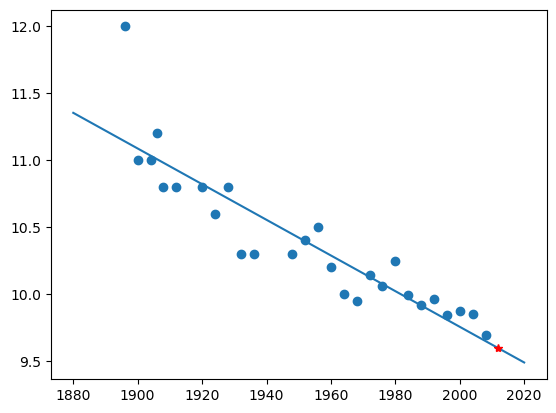

In [5]:
#plot the linear model
x_test = np.linspace(1880,2020,100)
plt.scatter(x, y) # original dataset
plt.plot(x_test, reg.predict(x_test[:,None])) # linear model line
plt.plot(2012, reg.predict(np.array([[2012]])),'r*') # prediction

Step3: Optimize the parameters using the Least Square Solution
Aims:
 .minimised the average loss, in order to achieve that we make the L(w0, w1) = 0.
 .There are several mathematical ways to compute w0 and w1, in this chapter we simply show two functions to do the caculation.

Function 1: using mean values:

In [6]:
xbar = x.mean() 
ybar = y.mean()
xxbar = np.multiply(x,x).mean()
xybar = np.multiply(x,y).mean()
print(xbar)
print(ybar)
print(xxbar)
print(xybar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


In [7]:
w1 = (ybar*xbar - xybar)/(xbar*xbar - xxbar)
w0 = ybar-w1*xbar
print(w0)
print(w1)

36.41645590250286
-0.013330885710960602


In [ ]:
Function 2: using sum values:

In [9]:
n = len(x)
w1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x*x) - sum(x)*sum(x))
w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
print(w0)
print(w1)

[36.4164559]
[-0.01333089]


plot the data again

Text(0, 0.5, 'Time (seconds)')

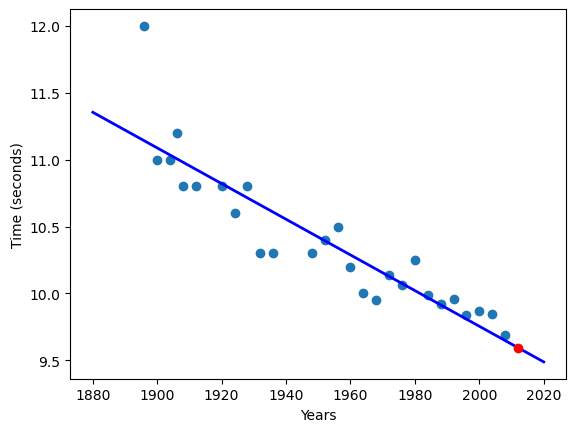

In [24]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
plt.plot(x_test,w0+w1*x_test,'b-',linewidth=2) # plot the fitted data

plt.plot(2012,w0+w1*2012,'ro') # plot the fitted data
plt.scatter(x,y) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

step4: evaluation(using AUC and ROC)

In [10]:
#example 1
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([1,1,1,0,0,])
y_scores = np.array([0.9,0.8,0.7,0.2,0.1])
print( "y_true is ",y_true)
print ("y_scores is ",y_scores)
print ("AUC is",roc_auc_score(y_true, y_scores))

y_true is  [1 1 1 0 0]
y_scores is  [0.9 0.8 0.7 0.2 0.1]
AUC is 1.0


In [11]:
#example 2
y_true = np.array([0, 0,0,1,1,1])
y_scores = np.array([0.1, 0.3, 0.4, 0.6, 0.7,0.8])
print("y_true is ",y_true)
print ("y_scores is ",y_scores)
print ("AUC is ",roc_auc_score(y_true, y_scores))

y_true is  [0 0 0 1 1 1]
y_scores is  [0.1 0.3 0.4 0.6 0.7 0.8]
AUC is  1.0


In [12]:
#example 3
y_true = np.array([0, 0,0,1])
y_scores = np.array([0.1, 0.2, 0.3, 0.8])
print("y_true is ",y_true)
print ("y_scores is ",y_scores)
print ("AUC is ",roc_auc_score(y_true, y_scores))

y_true is  [0 0 0 1]
y_scores is  [0.1 0.2 0.3 0.8]
AUC is  1.0


conclusion:
. linear regression model 
. parameters optimization
. evaluation